In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [49]:
img = cv2.imread('dataset/lena.jpg')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height = grayImage.shape[0]
width = grayImage.shape[1]

#### 大津法

In [50]:
def OTSU(grayImage):
    hist = cv2.calcHist([grayImage], [0], None, [256], [0, 256])
    hist = hist / (height * width)
    threshold = 0
    maxVariance = 0
    for i in range(256):
        w0 = np.sum(hist[:i])
        w1 = np.sum(hist[i:])
        u0 = np.sum(np.multiply(hist[:i], np.arange(i))) / w0
        u1 = np.sum(np.multiply(hist[i:], np.arange(i, 256))) / w1
        variance = w0 * w1 * (u0 - u1) ** 2
        if variance > maxVariance:
            maxVariance = variance
            threshold = i
    return threshold

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15168\597715307.py:9: RuntimeWarning: invalid value encountered in double_scalars
  u0 = np.sum(np.multiply(hist[:i], np.arange(i))) / w0
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15168\597715307.py:10: RuntimeWarning: invalid value encountered in double_scalars
  u1 = np.sum(np.multiply(hist[i:], np.arange(i, 256))) / w1


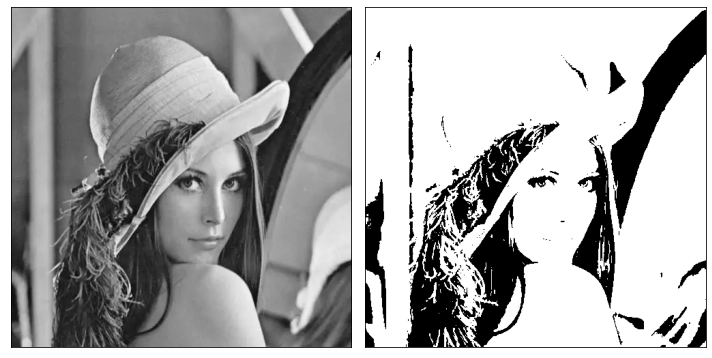

In [51]:
_, result = cv2.threshold(grayImage, OTSU(grayImage), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### 迭代法

In [52]:
def Iteration(grayImage):
    img_array = np.array(grayImage).astype(np.float32)
    zmax, zmin = np.max(img_array), np.min(img_array)
    threshold = (zmax + zmin) / 2
    b = 1
    while b == 0:
        ifg, ibg, f_num, b_num = 0, 0, 0, 0
        for i in range(1, height):
            for j in range(1, width):
                tmp = img_array[i, j]
                if tmp >= threshold:
                    ifg = ifg + 1
                    f_num = f_num + int(tmp)
                else:
                    ibg = ibg + 1
                    b_num = b_num + int(tmp)
        zo = int(f_num / ifg)
        zb = int(b_num / ibg)
        if threshold == int((zo + zb) / 2):
            b = 0
        else:
            threshold = int((zo + zb) / 2)
    return threshold


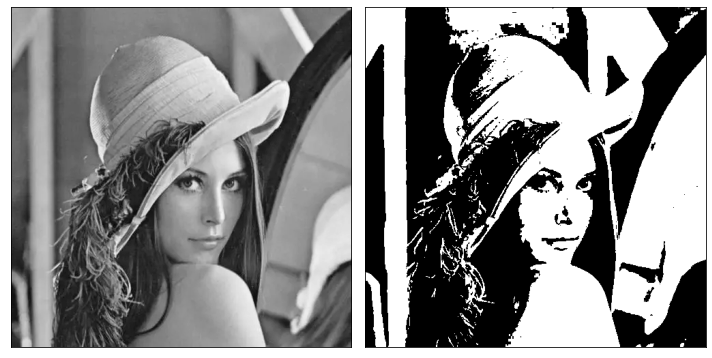

In [53]:
_, result = cv2.threshold(grayImage, Iteration(grayImage), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()